#### Q1. What is the relationship between polynomial functions and kernel functions in machine learning algorithms?

- Kernal function used to increase diamensonity and of the class spaces and get the proper output

### Q2. How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?
from sklearn.svm import SVC

svc=SVC(kernel='poly')
- Its convert the lower diamensional to higher diamensional space it easier to seprate the calsses

#### Q3. How does increasing the value of epsilon affect the number of support vectors in SVR?
-  Epsilon in the epsilon-SVR model. It specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual  value.

##### Q4. How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter affect the performance of Support Vector Regression (SVR)? Can you explain how each parameter works and provide examples of when you might want to increase or decrease its value?

- Kernel Function:
    - A kernel function is a mathematical function used to map input data into a higher-dimensional space, where it can be more easily separated. The choice of kernel function can have a significant impact on the performance of the SVR model. 
    
- C Parameter:
    - The C parameter controls the trade-off between minimizing the training error and maximizing the margin. A larger C value leads to a smaller margin and may result in overfitting, whereas a smaller C value leads to a larger margin and may result in underfitting.
    
- Epsilon Parameter
    - If the model is underfitting, try increasing the epsilon value to allow for more error in the predictions.
    - If the model is overfitting, try decreasing the epsilon value to reduce the amount of error allowed in the predictions.
 
- Gamma Parameter:
    - If the model is overfitting, try decreasing the gamma value to smooth the decision boundary and reduce the complexity of the model.
    -  If the model is underfitting, try increasing the gamma value to increase the complexity of the decision boundar

####  Q5. Assignment:
- Import the necessary libraries and load the dataseg
- Split the dataset into training and testing setZ
- Preprocess the data using any technique of your choice (e.g. scaling, normaliMationK
- Create an instance of the SVC classifier and train it on the training datW
- hse the trained classifier to predict the labels of the testing datW
-  Evaluate the performance of the classifier using any metric of your choice (e.g. accuracy,precision, recall, F1-scoreK
-  Tune the hyperparameters of the SVC classifier using GridSearchCV or RandomiMedSearchCV to improve its performanc_
-  Train the tuned classifier on the entire dataseg
-  Save the trained classifier to a file for future use.

In [6]:
## import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.datasets import load_wine

In [8]:
data=load_wine()

In [10]:
df=pd.DataFrame(data=data.data,columns=data.feature_names)

In [12]:
df['target']=data.target

In [13]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [16]:
## check the null values
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [22]:
X=df.drop('target',axis=1)
y=df['target']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

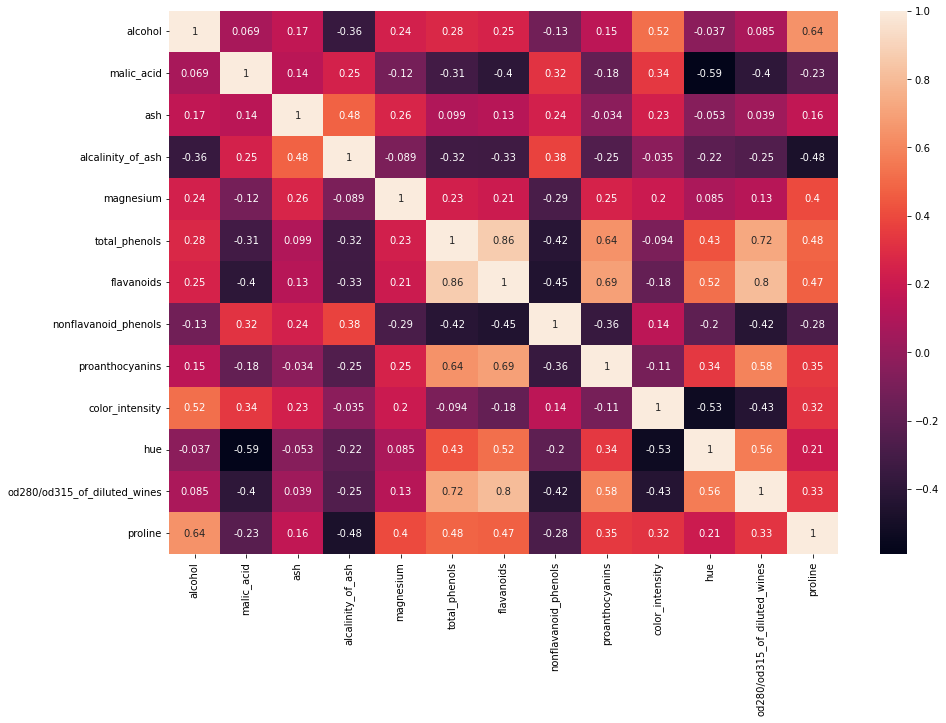

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [26]:
X_train.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.069440,0.167002,-0.360158,0.237360,0.277907,0.251519,-0.127721,0.146493,0.515964,-0.036647,0.085242,0.641952
malic_acid,0.069440,1.000000,0.142117,0.246415,-0.116898,-0.314918,-0.403611,0.321738,-0.183782,0.337772,-0.591303,-0.396481,-0.225933
ash,0.167002,0.142117,1.000000,0.477359,0.263986,0.099235,0.125001,0.239785,-0.034239,0.232141,-0.052726,0.038590,0.162346
alcalinity_of_ash,-0.360158,0.246415,0.477359,1.000000,-0.089111,-0.318677,-0.326997,0.375563,-0.251148,-0.035428,-0.217462,-0.251871,-0.476717
magnesium,0.237360,-0.116898,0.263986,-0.089111,1.000000,0.234186,0.206917,-0.286220,0.250858,0.198510,0.084777,0.125782,0.398281
total_phenols,0.277907,-0.314918,0.099235,-0.318677,0.234186,1.000000,0.864211,-0.419609,0.643966,-0.093801,0.427547,0.724897,0.483149
flavanoids,0.251519,-0.403611,0.125001,-0.326997,0.206917,0.864211,1.000000,-0.449085,0.694431,-0.179876,0.515672,0.804311,0.466008
nonflavanoid_phenols,-0.127721,0.321738,0.239785,0.375563,-0.286220,-0.419609,-0.449085,1.000000,-0.359004,0.143951,-0.200320,-0.424148,-0.279554
proanthocyanins,0.146493,-0.183782,-0.034239,-0.251148,0.250858,0.643966,0.694431,-0.359004,1.000000,-0.112177,0.340967,0.583871,0.346717
color_intensity,0.515964,0.337772,0.232141,-0.035428,0.198510,-0.093801,-0.179876,0.143951,-0.112177,1.000000,-0.533124,-0.432222,0.316649


In [27]:
from sklearn.svm import SVC

In [28]:
svc=SVC(kernel='linear')

In [29]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [30]:
y_pred=svc.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,f1_score

In [33]:
print(accuracy_score(y_test,y_pred))

0.9830508474576272


In [37]:
print(recall_score(y_test,y_pred,average='micro'))

0.9830508474576272


In [44]:
print(f1_score(y_test,y_pred,average='weighted'))

0.9831439107523005


In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.96      0.98        24
           2       0.94      1.00      0.97        15

    accuracy                           0.98        59
   macro avg       0.98      0.99      0.98        59
weighted avg       0.98      0.98      0.98        59



In [46]:
parameter={
    'kernel' : ('linear', 'poly', 'rbf'),
    'C':[0.1,10,100,1000],
    'gamma' : ('scale', 'auto'),
}
parameter

{'kernel': ('linear', 'poly', 'rbf'),
 'C': [0.1, 10, 100, 1000],
 'gamma': ('scale', 'auto')}

In [48]:
from sklearn.model_selection import GridSearchCV
Svc_cv=SVC()

In [49]:
gv=GridSearchCV(Svc_cv,param_grid=parameter,cv=5,verbose=3)

In [50]:
gv.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.917 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.917 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.958 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.958 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.957 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.625 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.542 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.708 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.708 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.565 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 10, 100, 1000], 'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'poly', 'rbf')},
             verbose=3)

In [51]:
gv.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [55]:
svc_best=SVC(C= 0.1, gamma='scale', kernel= 'linear')
svc_best.fit(X_train,y_train)

SVC(C=0.1, kernel='linear')

In [56]:
y_predbest=svc_best.predict(X_test)

In [57]:
print(classification_report(y_test,y_predbest))
print(confusion_matrix(y_test,y_predbest))
print(accuracy_score(y_test,y_predbest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        15

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

[[20  0  0]
 [ 0 24  0]
 [ 0  0 15]]
1.0
